# **Week 11 Activity**


### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer:** 

The type of supervised learning which is most suitable for this problem is 'classification'. Because we are only dealing with 2 Discrete outcomes and they are :
1. Students who need an early intervention.
2. Students who do not need an early intervention.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
#Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns

In [2]:
# Read student data
pd.set_option('display.max_columns', None)
sdata=pd.read_csv('student-data.csv')
sdata.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [7]:
# Calculate number of students
n_students = len(sdata.index) # Alternate sdata.shape[0]

In [8]:
# Calculate number of features
n_features = len(sdata.columns) # Alternate sdata.shape[1]

In [9]:
# Calculate passing students
n_passed = len(sdata[sdata.passed == 'yes'])

In [10]:
# Calculate failing students
n_failed = len(sdata[sdata.passed == 'no'])

In [11]:
# Calculate graduation rate
grad_rate = round((n_passed/n_students)*100, 2)

In [12]:
# Print the results
print('1. Total number of students, n_students =', n_students)
print('2. Total number of features for each student, n_features =', n_features)
print('3. Number of passed students, n_passed =', n_passed)
print('4. Number of failed students, n_failed =', n_failed)
print('5. Graduation rate of the class, grad_rate, in percentage (%) =', grad_rate)

1. Total number of students, n_students = 395
2. Total number of features for each student, n_features = 31
3. Number of passed students, n_passed = 265
4. Number of failed students, n_failed = 130
5. Graduation rate of the class, grad_rate, in percentage (%) = 67.09


## Preparing the Data
You will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


Separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
sdata_features = list(sdata.columns[:-1])

In [4]:
# Extract target column 'passed'
sdata_target = sdata.columns[-1]

In [5]:
# Separate the data into feature data and target data (X and y, respectively)
X = sdata[sdata_features]
y = sdata[sdata_target]

In [6]:
dtypes=X.dtypes.to_frame('Data type')
dtypes.reset_index(level=0, inplace=True)
dtypes.rename(columns = {'index':'Feature'}, inplace = True)
dtypes[dtypes['Data type'] == 'object']

,Feature,Data type
0,school,object
1,sex,object
3,address,object
4,famsize,object
5,Pstatus,object
8,Mjob,object
9,Fjob,object
10,reason,object
11,guardian,object
15,schoolsup,object


### Notes:
* There are **23 Non-numeric features** present in feature data frame (X).

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

#### Step 1. Label encoding

In [6]:
# Getting a list of column names from feature dataframe which are suitable for label encoding
X_Cols = []
for i in list(X.columns):
    if X[i].dtype == 'O' and len(X[i].unique()) == 2:
        X_Cols.append(i)
        
print('The below given list of columns needs a Label Encoding:\n',X_Cols)      

The below given list of columns needs a Label Encoding:
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [7]:
# Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
Label_Enc= LabelEncoder()
temp_df=pd.DataFrame()
temp_df2=pd.DataFrame()
for k in X_Cols:
    l=X[k].values
    l=Label_Enc.fit_transform(l)
    temp_df2=pd.DataFrame(l, columns=[str(k)])
    temp_df = pd.concat([temp_df, temp_df2], axis=1)

In [11]:
# Sample preview of 5 enries in the label encoded dataframe
temp_df.head(5)

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,1,0
2,0,0,1,1,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,0,1,1,0,1,1,0,0


In [12]:
# Replacing the original columns in the feature dataframe with encoded columns
import warnings
warnings.filterwarnings("ignore")
X[X_Cols]=temp_df[X_Cols]
# Sample preview of the feature dataframe
X.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4


#### Step 2. One hot Encoding

In [13]:
X = pd.get_dummies(X)
X.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [14]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size = 95, random_state=42)

In [17]:
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

**There are 17 classes of supervised learning models available in Scikit-Learn (Ver.1.0.2) at the time of creation of this notebook. Out of them we selected 3 Models which are best suited for our data.**

#### 1. **Support Vector Machine**

  _“Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges.In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well \._ 
  * Pros:
    * It works really well with a clear margin of separation
    * It is effective in high dimensional spaces.
    * It is effective in cases where the number of dimensions is greater than the number of samples.
    * It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
  * Cons:
    * It doesn’t perform well when we have large data set because the required training time is higher
    * It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
    * SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

#### 2. **Logistic Regression**

  _Logistic regression is a classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. It supports categorizing data into discrete classes by studying the relationship from a given set of labelled data._
  * Pros:
    * Logistic regression is easier to implement, interpret, and very efficient to train.
    * It makes no assumptions about distributions of classes in feature space.
    * It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.
  * Cons:
    * If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
    * It constructs linear boundaries.
    * The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

#### 3. **K-NN**

  _K- Nearest Neighbors or also known as K-NN belong to the family of supervised machine learning algorithms which means we use labeled (Target Variable) dataset to predict the class of new data point. The K-NN algorithm is a robust classifier which is often used as a benchmark for more complex classifiers such as Artificial Neural Network (ANN) or Support vector machine (SVM)._

  * Pros:    
    * **K-NN is pretty intuitive and simple:** K-NN algorithm is very simple to understand and equally easy to implement. To classify the new data point K-NN algorithm reads through whole dataset to find out K nearest neighbors.
    * **K-NN has no assumptions:** K-NN is a non-parametric algorithm which means there are assumptions to be met to implement K-NN. Parametric models like linear regression has lots of assumptions to be met by data before it can be implemented which is not the case with K-NN.
    * **No Training Step:** K-NN does not explicitly build any model, it simply tags the new data entry based learning from historical data. New data entry would be tagged with majority class in the nearest neighbor.
    * **It constantly evolves:** Given it’s an instance-based learning; k-NN is a memory-based approach. The classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use.
  * Cons:
    * **K-NN slow algorithm:** K-NN might be very easy to implement but as dataset grows efficiency or speed of algorithm declines very fast.
    * **Curse of Dimensionality:** KNN works well with small number of input variables but as the numbers of variables grow K-NN algorithm struggles to predict the output of new data point.
    * **K-NN needs homogeneous features:** If you decide to build k-NN using a common distance, like Euclidean or Manhattan distances, it is completely necessary that features have the same scale, since absolute differences in features weight the same, i.e., a given distance in feature 1 must means the same for feature 2.
    * **Optimal number of neighbors:** One of the biggest issues with K-NN is to choose the optimal number of neighbors to be consider while classifying the new data entry.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

#### Explanation

Model  | Real-world Application | Strength | Weakness | Reason to choose
------------------------------------------|-------------------|-------------------|-------------------|-------------------|
Logistic Regression | Cancer prediction based on patient characteristics | predictions on small datasets </br> small number of features </br> with this can be efficient and fast | When data contains features with </br> complexity,  unless the features are </br> carefully selected and finetuned this </br> may suffer from under / over - fitting | This model may be suitable since the expected output </br>is categorical and binary on top |
K-NN | Applications that call for pattern recognition </br> to determine outcome (Including recognizing </br> faces of people in pictures) | Simplest and yet effective </br> (facial recognition !!) | It is instance-based and lazy learning.</br>  It is sensitive to the local structure of the data | With 56 total features and 395 observations, k-NN will certainly </br> be manageable computationally |
SVM | SVMs allow Text and hypertext categorization </br> for both inductive and transductive models. They </br> use training data to classify documents into </br> different categories.  | Text and hypertext categorization | SVM algorithm is not suitable for large data sets. </br> SVM does not perform very well when </br> the data set has more noise i.e. </br> target classes are overlapping. | Here, we have only one target class and is not overlapping.</br>  Hence we can use SVM |

In [20]:
# Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LogisticRegression as LR

In [21]:
# fit model-1  on traning data
SVCModel = SVC(kernel='rbf') 
SVCModel.fit(X_train, y_train)

SVC()

In [23]:
# predict on the test data
y_pred=SVCModel.predict(X_test)

In [24]:
# Importing confusion_matrix from sklearn.metrics as CM
from sklearn.metrics import confusion_matrix as CM
# Importing classification_report from sklearn.metrics as CR
from sklearn.metrics import classification_report as CR
# Final status of the predictions made by the SV Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00        31
         yes       0.67      1.00      0.81        64

    accuracy                           0.67        95
   macro avg       0.34      0.50      0.40        95
weighted avg       0.45      0.67      0.54        95

Confusion matrix of the model is:
 [[ 0 31]
 [ 0 64]]


In [28]:
# calculate the accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy on training set:', round(SVCModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 0.67
Accuracy on test set: 0.67
Precision score on test set: 0.34
Recall score on test set: 0.5
F1 score on test set: 0.4


In [29]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy
LRModel = LR()
LRModel.fit(X_train, y_train)

LogisticRegression()

In [30]:
# predict on the test data
y_pred=LRModel.predict(X_test)

In [31]:
# Final status of the predictions made by the Logistic Regression Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.43      0.32      0.37        31
         yes       0.71      0.80      0.75        64

    accuracy                           0.64        95
   macro avg       0.57      0.56      0.56        95
weighted avg       0.62      0.64      0.63        95

Confusion matrix of the model is:
 [[10 21]
 [13 51]]


In [32]:
# calculate the accuracy score
print('Accuracy on training set:', round(LRModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 0.77
Accuracy on test set: 0.64
Precision score on test set: 0.57
Recall score on test set: 0.56
F1 score on test set: 0.56


In [33]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy
# Checking for optimal n_neighbour value
# Importing KNeighborsClassifier from sklearn.neighbors as KNC
Accuracy_range=[]
N_range=np.arange(4,20)
for i in N_range:
    KModel=KNC(n_neighbors=i)
    KModel.fit(X_train,y_train)
    y_pred=KModel.predict(X_test)
    Accuracy_range.append(accuracy_score(y_test,y_pred))
    
print(Accuracy_range)

[0.6526315789473685, 0.6947368421052632, 0.6842105263157895, 0.7052631578947368, 0.6736842105263158, 0.6947368421052632, 0.6736842105263158, 0.6736842105263158, 0.6842105263157895, 0.6736842105263158, 0.6526315789473685, 0.6736842105263158, 0.6842105263157895, 0.6842105263157895, 0.6947368421052632, 0.7052631578947368]


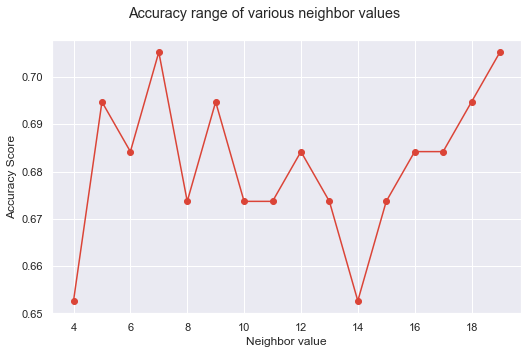

In [35]:
f, ax = plt.subplots(figsize=(7.5, 5))
f.suptitle('Accuracy range of various neighbor values')
sns.set_theme()
plt.plot( N_range, Accuracy_range, marker='o', color='#DB4437')
plt.xlabel('Neighbor value')
plt.ylabel('Accuracy Score')
f.tight_layout()
plt.show()

>Selecting optimal neighbor value as '7'

In [36]:
KNCModel=KNC(n_neighbors=5)
KNCModel.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
# predict on the test data
y_pred=KNCModel.predict(X_test)

In [39]:
# Final status of the predictions made by the KNN Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.57      0.26      0.36        31
         yes       0.72      0.91      0.80        64

    accuracy                           0.69        95
   macro avg       0.64      0.58      0.58        95
weighted avg       0.67      0.69      0.65        95

Confusion matrix of the model is:
 [[ 8 23]
 [ 6 58]]


In [38]:
# calculate the accuracy score
print('Accuracy on training set:', round(KNCModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 0.78
Accuracy on test set: 0.69
Precision score on test set: 0.64
Recall score on test set: 0.58
F1 score on test set: 0.58


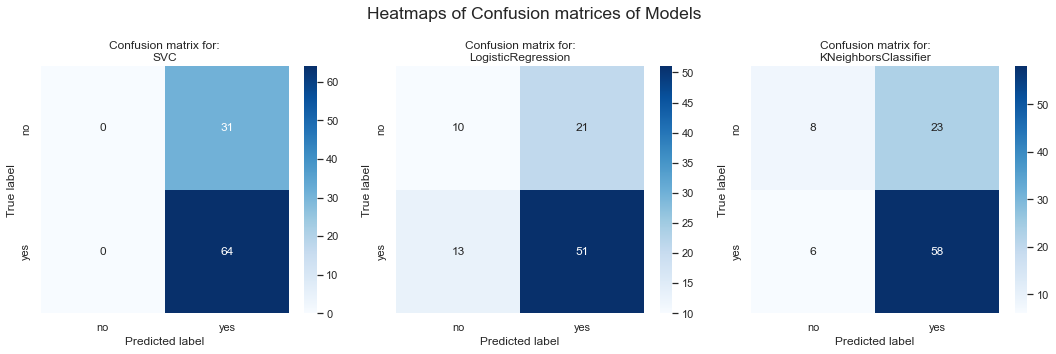

In [67]:
# creating a list containing the desired models
models = [SVCModel, LRModel, KNCModel]

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Setting the sns plot theme
sns.set_theme(style="whitegrid")

# Giving a plot title
fig.suptitle('Heatmaps of Confusion matrices of Models', fontsize=17.5)

# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()

for model, ax in zip(models, axes):
    cm = CM(y_test.values, model.predict(X_test))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], ax=ax)
    ax.set_title('Confusion matrix for:\n{}'.format(model.__class__.__name__))
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
fig.tight_layout()
fig.show()

## **Summary:**

Model  | Accuracy on Training set | Accuracy on Test set | Precision score | Recall score | F1 score
------------------------------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
SVM | 0.67 | 0.67 | 0.34 | 0.5 | 0.4 |
Logistic Regression | 0.77 | 0.64 | 0.57 | 0.56 | 0.56 |
K-NN | 0.78 | 0.69 | 0.64 | 0.58 | 0.58 |

Out of the above 3 Models K-Nearest Neighbors Model shown a much better performance than the other two Models. So we can give more preference to KNN for developing an efficient classifier model for our data.

*End of the file reached!*